In [67]:
!pip install kaggle

In [68]:
import kaggle

In [69]:
!kaggle competitions download -c kagglex-cohort4

kagglex-cohort4.zip: Skipping, found more recently modified local copy (use --force to force download)


In [70]:
!tar -xvf "E:\\KaggleX_2024\\kagglex-cohort4.zip" -C "E:\\KaggleX_2024\\"


x sample_submission.csv
x test.csv
x train.csv


In [71]:
import pandas as pd

df=pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [72]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [73]:
print(df.describe())

                 id    model_year         milage         price
count  54273.000000  54273.000000   54273.000000  5.427300e+04
mean   27136.000000   2015.091979   72746.175667  3.921844e+04
std    15667.409917      5.588909   50469.490448  7.282634e+04
min        0.000000   1974.000000     100.000000  2.000000e+03
25%    13568.000000   2012.000000   32268.000000  1.550000e+04
50%    27136.000000   2016.000000   66107.000000  2.800000e+04
75%    40704.000000   2019.000000  102000.000000  4.500000e+04
max    54272.000000   2024.000000  405000.000000  2.954083e+06


In [74]:
categorical_columns=['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

for col in categorical_columns:
    print(f"{col} unique number of value: {df[col].nunique()}")

brand unique number of value: 53
model unique number of value: 1827
fuel_type unique number of value: 7
engine unique number of value: 1061
transmission unique number of value: 46
ext_col unique number of value: 260
int_col unique number of value: 124
accident unique number of value: 2
clean_title unique number of value: 1


In [75]:
print(df.isnull().sum())

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64


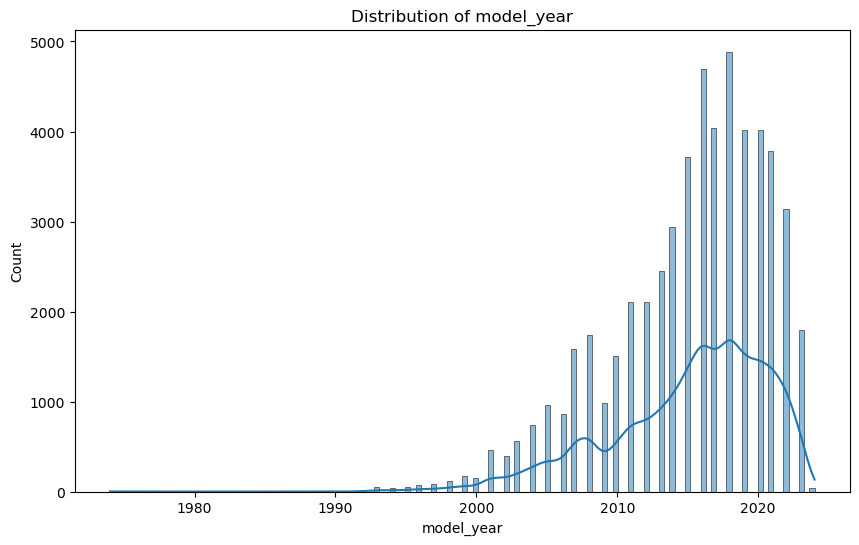

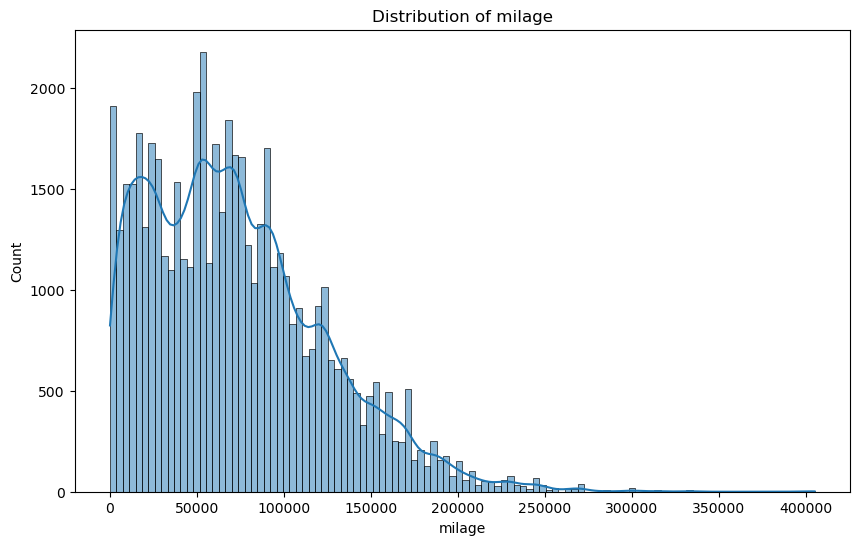

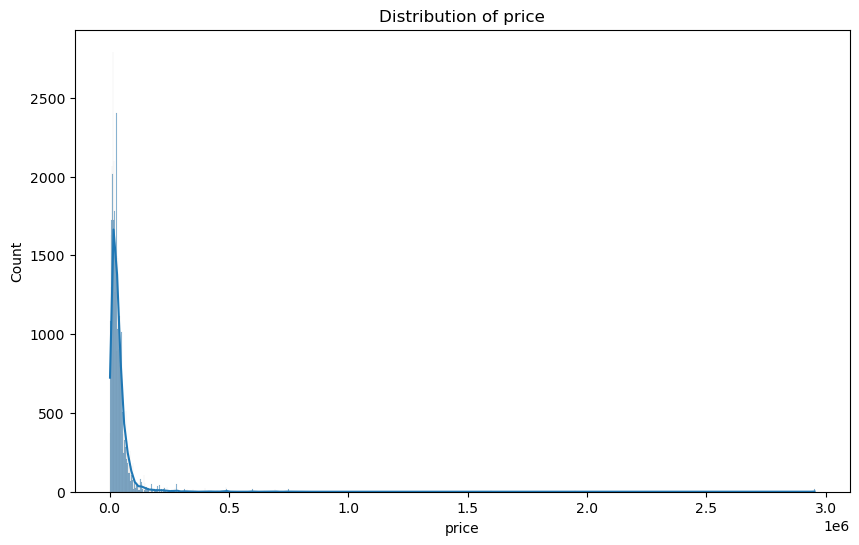

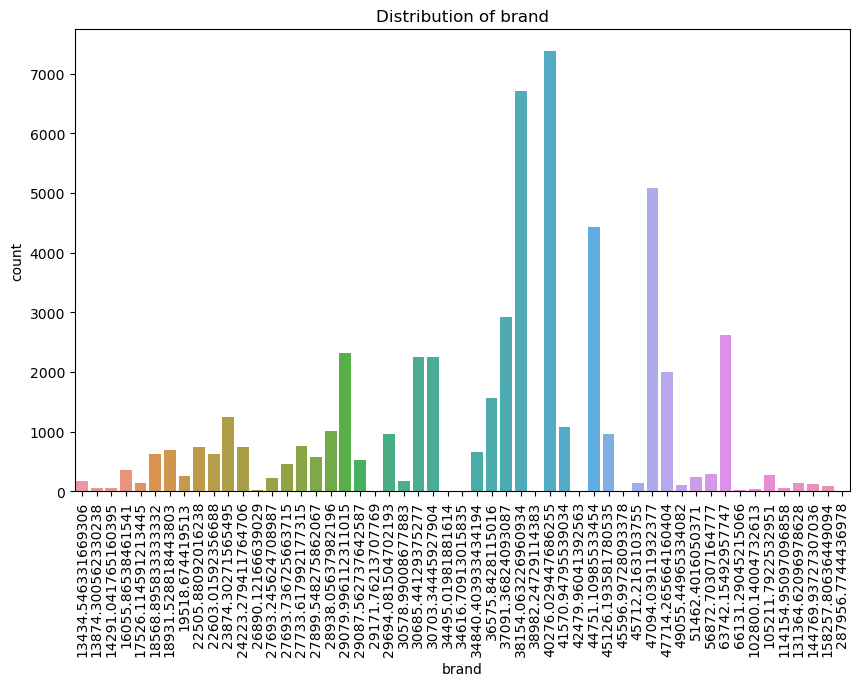

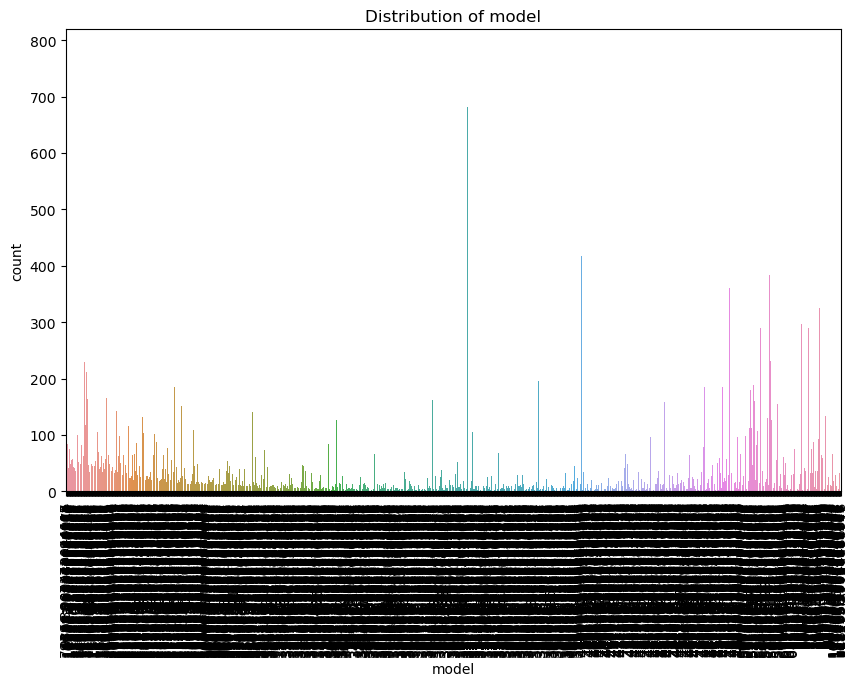

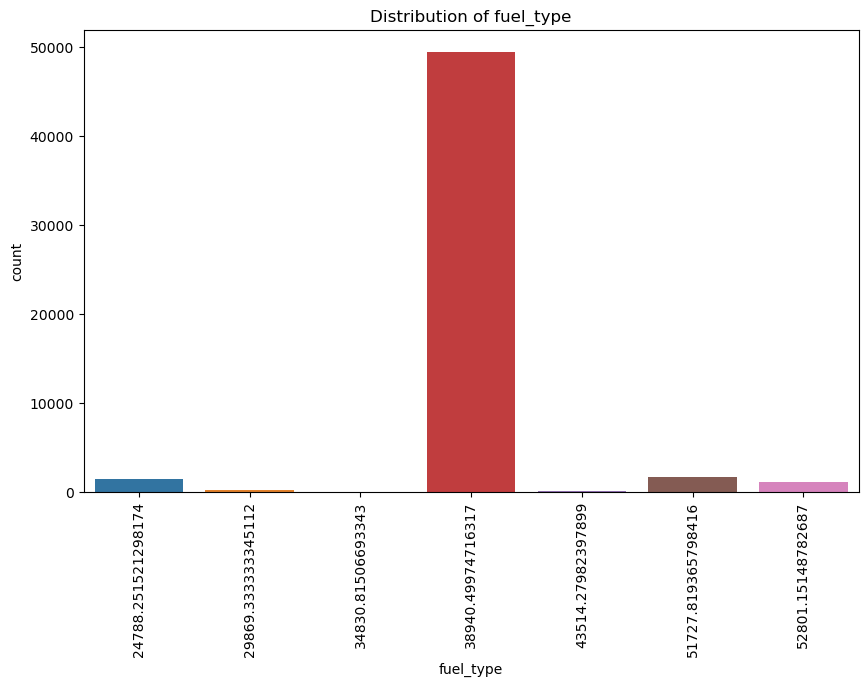

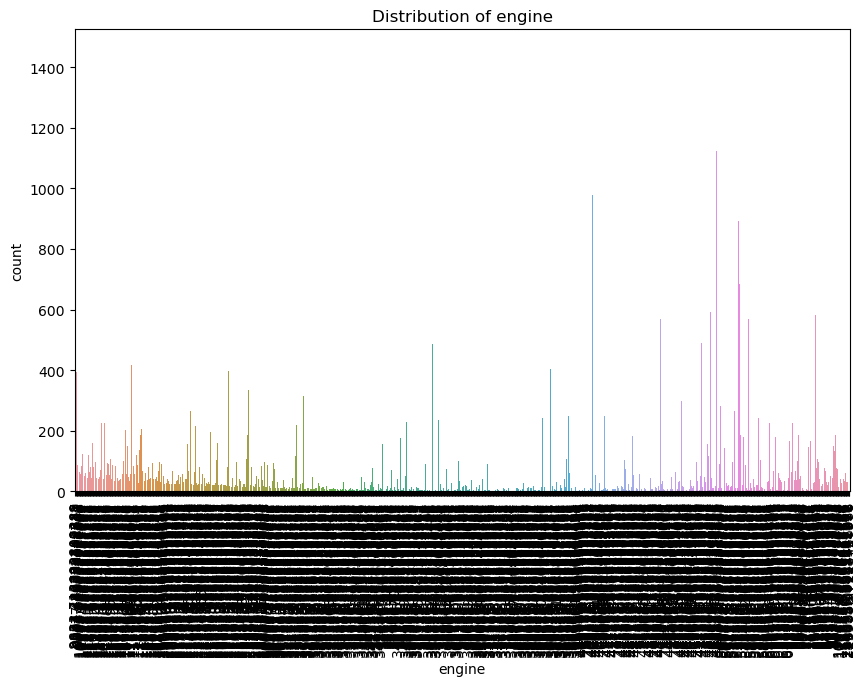

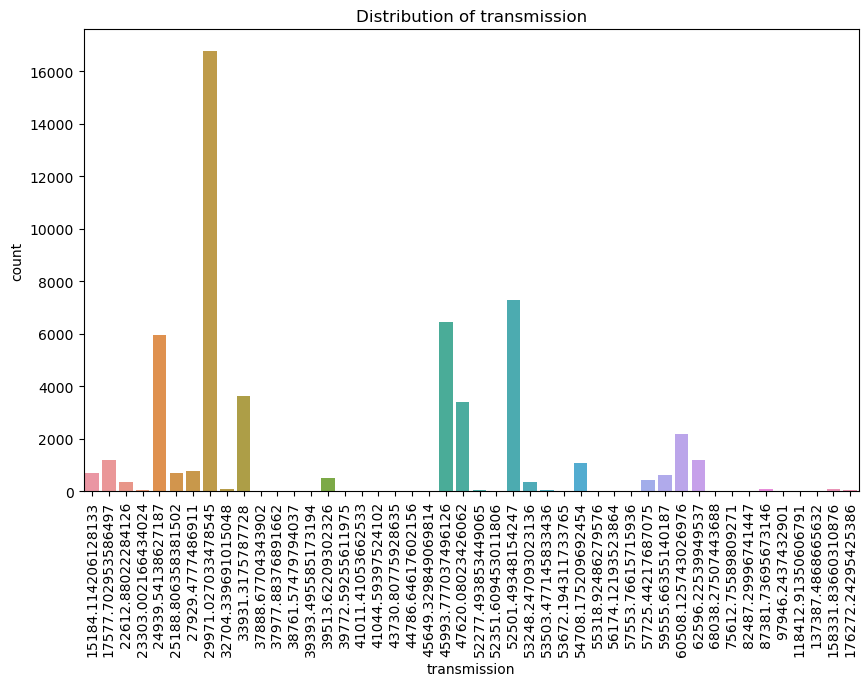

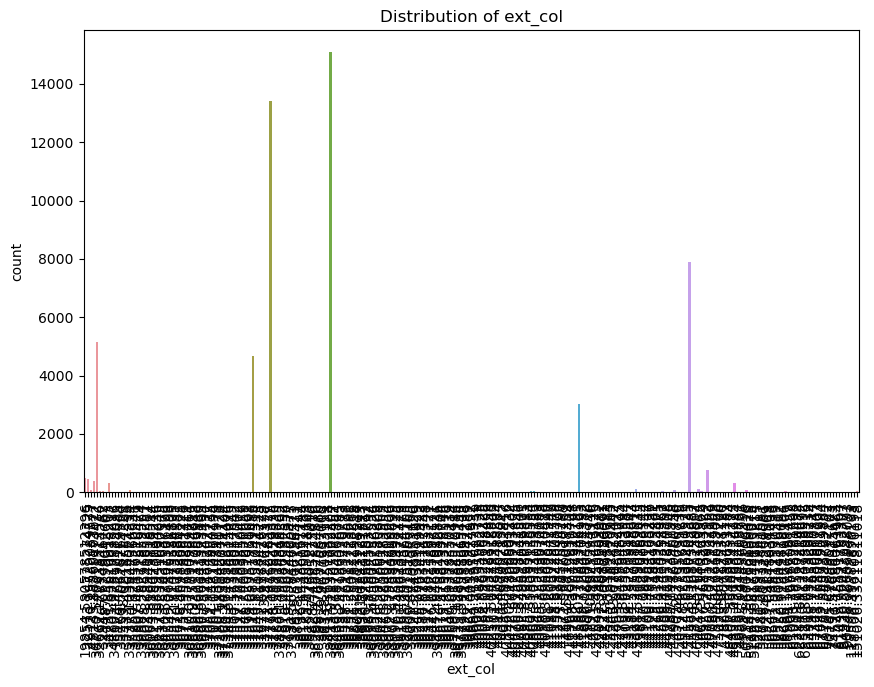

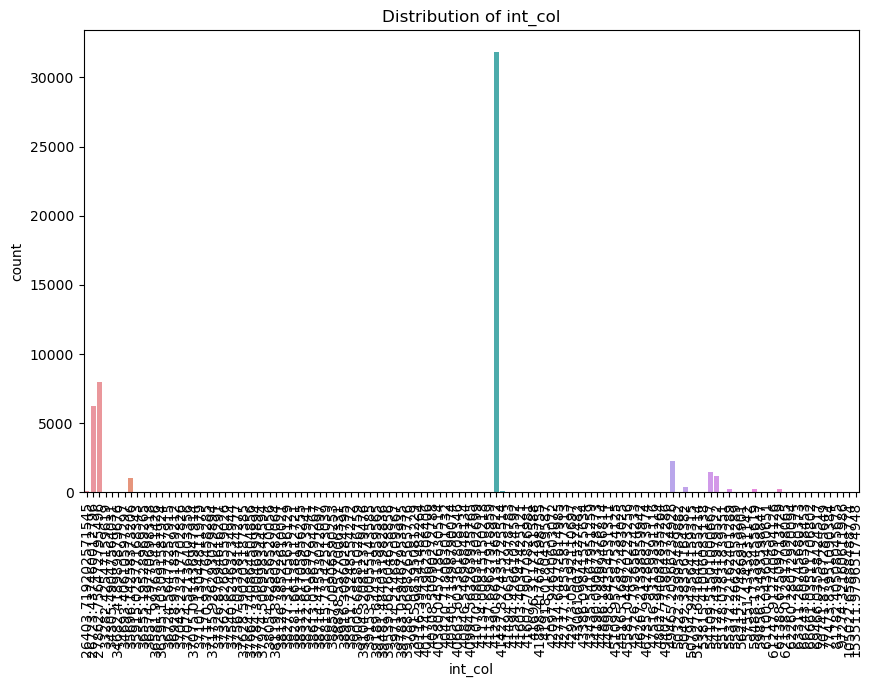

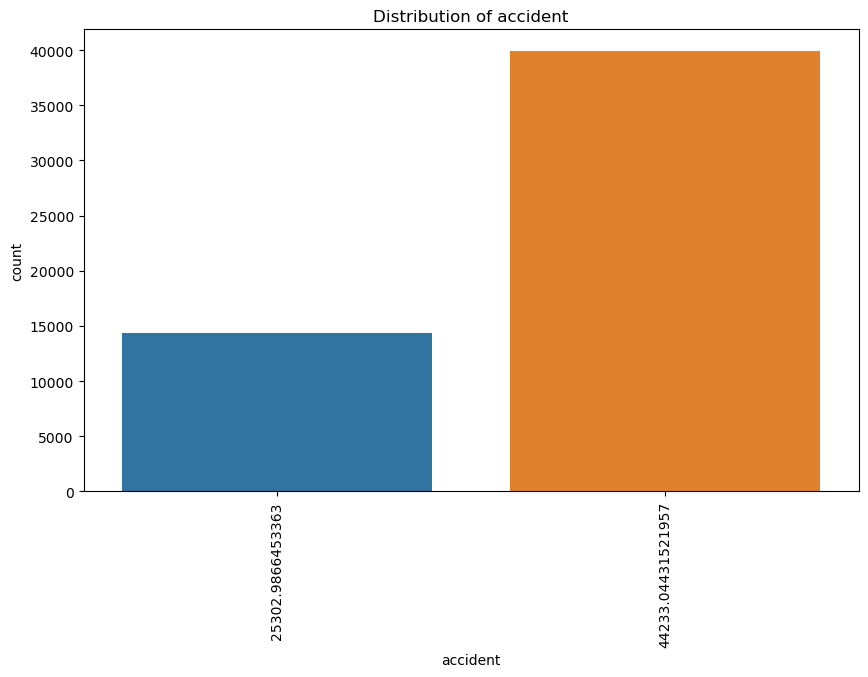

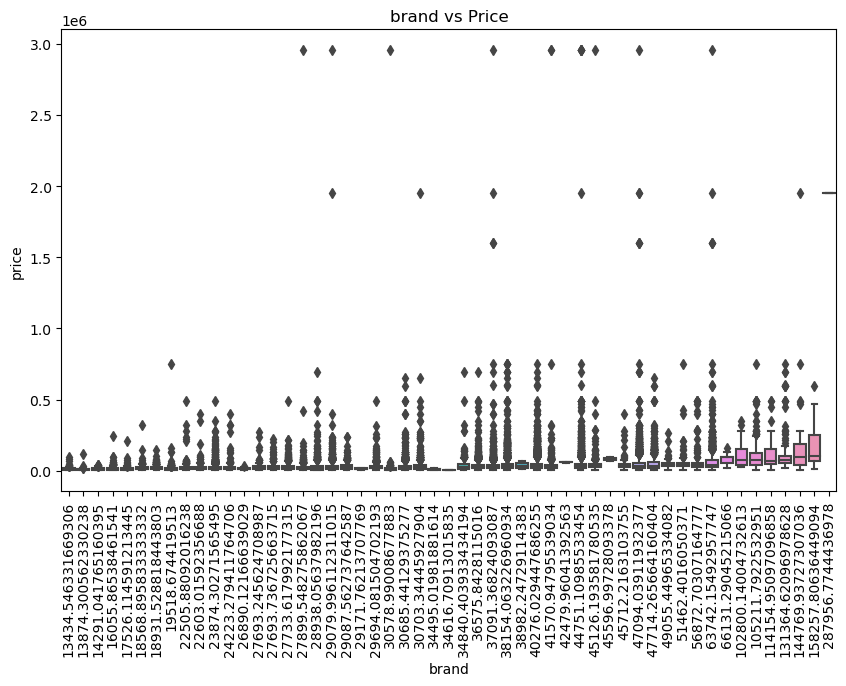

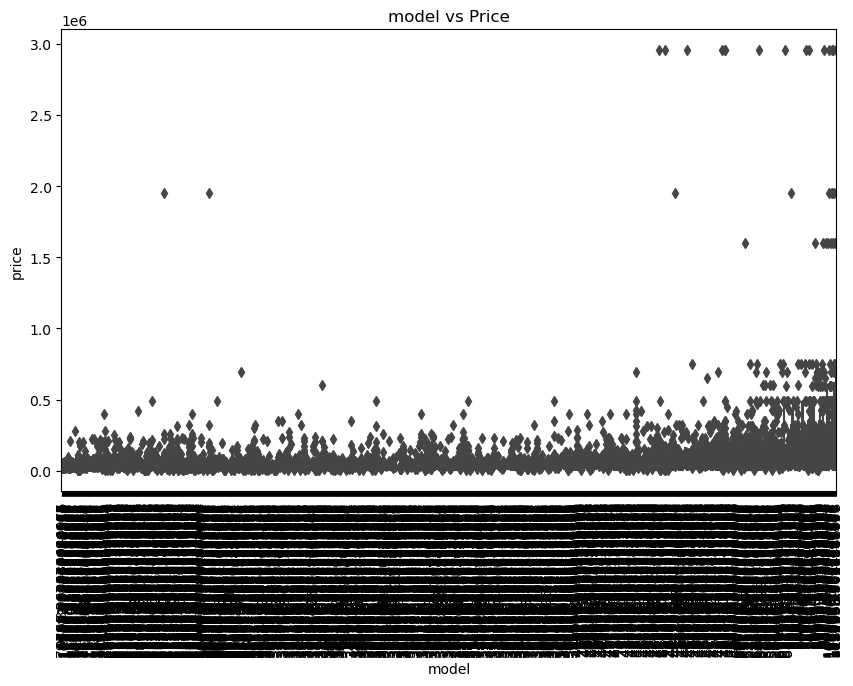

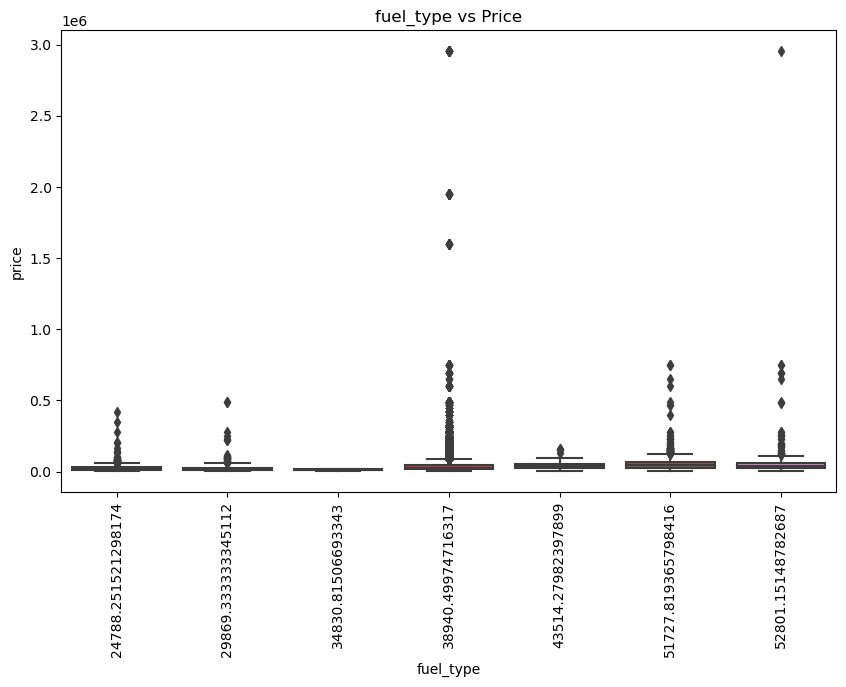

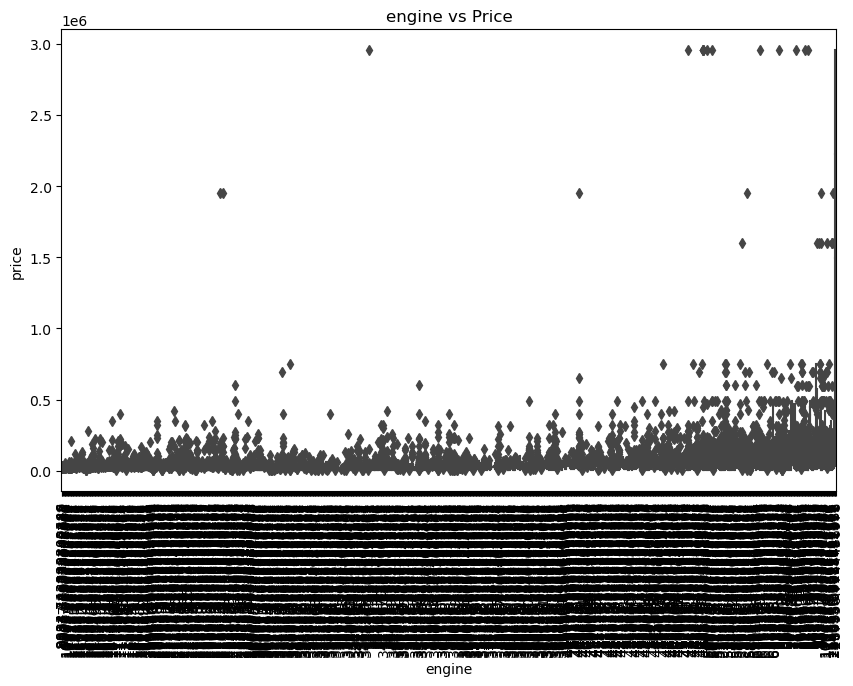

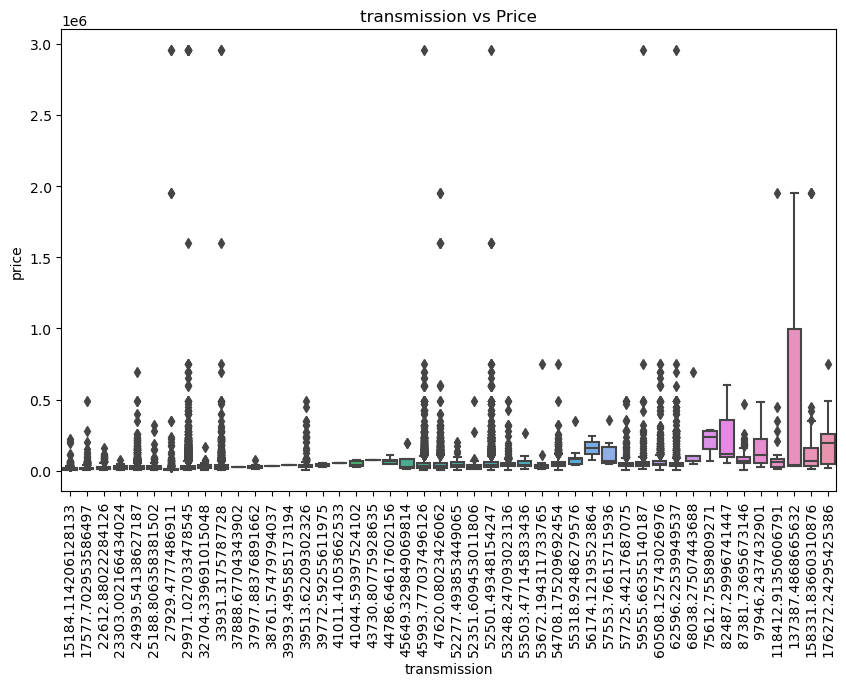

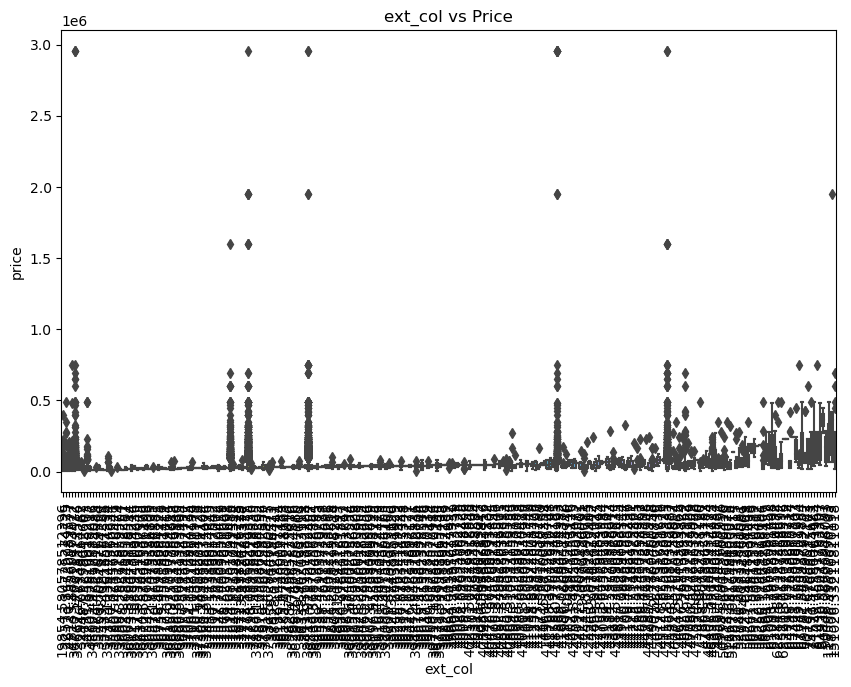

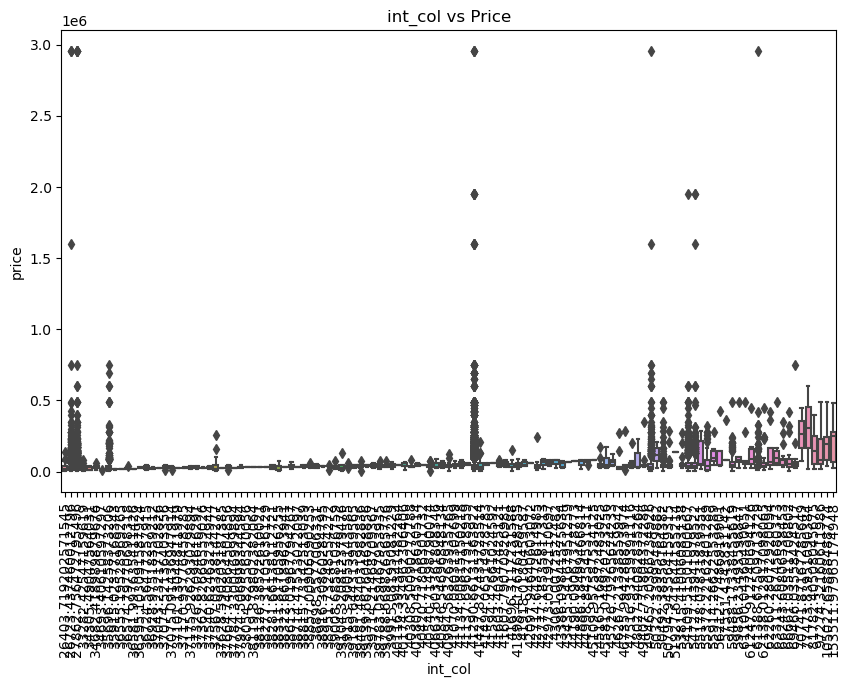

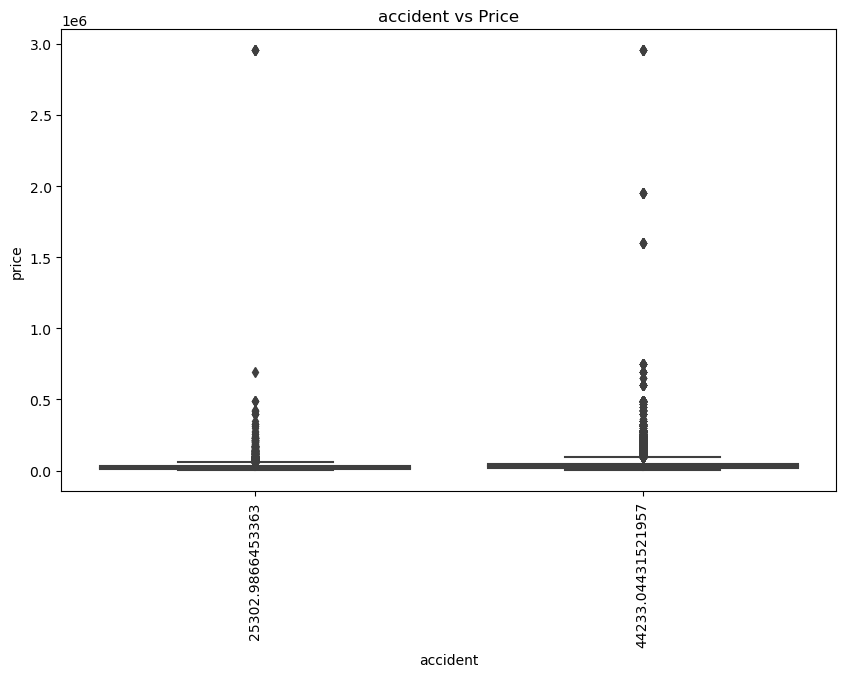

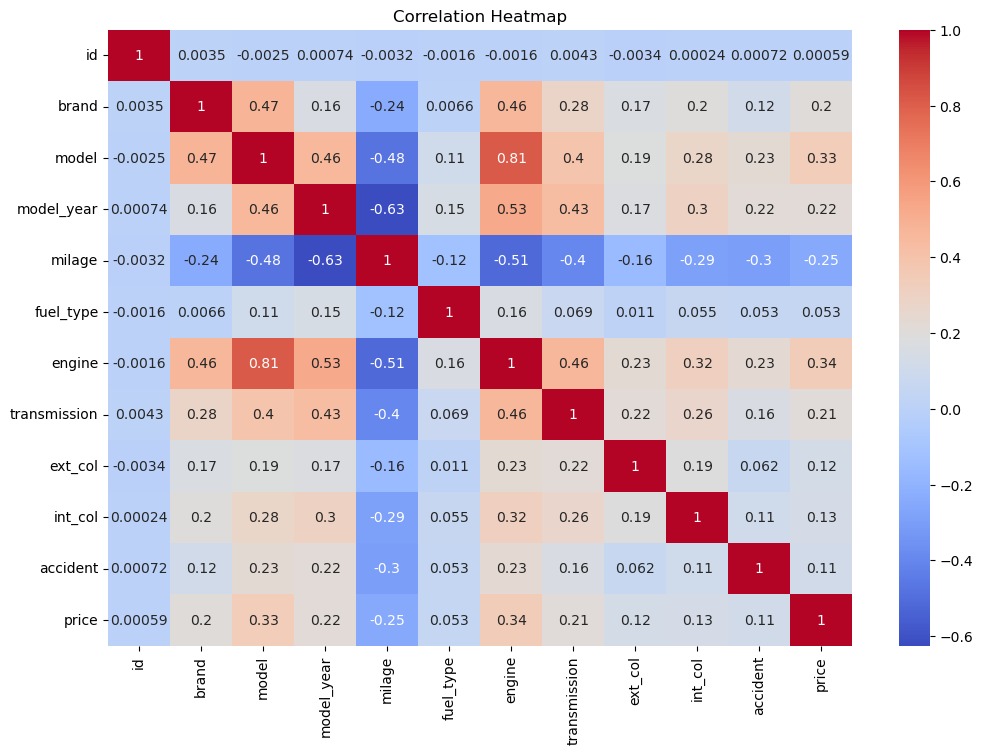

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numeric variables
numeric_columns = ['model_year', 'milage', 'price']
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Distribution of categorical variables
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

# Relationship between features and target variable
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], y=df['price'])
    plt.title(f'{col} vs Price')
    plt.xticks(rotation=90)
    plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Brand vs. Price: There's significant variance in prices within brands, with some brands having very high-priced cars.
Model vs. Price: There's a lot of variance and a large number of unique models.
Fuel Type vs. Price: Different fuel types show different price distributions, with gasoline cars having a wide price range.
Engine vs. Price: A high cardinality feature with significant variance.
Transmission vs. Price: Different transmission types show different price distributions.
External Color vs. Price: A high cardinality feature with a lot of variance.
Internal Color vs. Price: Similar to external color, there's a lot of variance.
Accident vs. Price: The presence of accidents affects the price.
Correlation Heatmap: model_year and milage show some correlation with the price.

- Target encoding
- 

In [77]:
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


categorical_columns = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident']
target_column = 'price'

encoder = TargetEncoder(cols=categorical_columns)

#fit and transoform categorical columns
df[categorical_columns] = encoder.fit_transform(df[categorical_columns], df[target_column])


In [79]:
import numpy as np

df['price'] = np.where(df['price'] > df['price'].quantile(0.99), df['price'].quantile(0.99), df['price'])

#aggregating rare categories
threshold = 100
for col in ['model', 'engine', 'ext_col', 'int_col']:
    counts = df[col].value_counts()
    df[col] = np.where(df[col].isin(counts[counts > threshold].index), df[col], 'Other')

In [80]:
numerical_columns = ['model_year', 'milage']
scaler = StandardScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [64]:

X = df.drop(['id', 'price', 'clean_title'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 43418
Testing set size: 10855


In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 17726.55571902349
Mean Squared Error: 2644711559.4590006


In [82]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Train the model with the best parameters
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred_best = best_model.predict(X_test)

# Evaluate the model
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

print(f'Best Model Mean Absolute Error: {mae_best}')
print(f'Best Model Mean Squared Error: {mse_best}')

# Save the best model
joblib.dump(best_model, 'hyperparameter_tuned_random_forest.pkl')


Fitting 3 folds for each of 216 candidates, totalling 648 fits
